In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt
import csv
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from scipy import stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, OrdinalEncoder, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

In [10]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [11]:
mc = pd.read_csv('mc.csv')

In [12]:
mc.head()
mc.session.value_counts()

Afternoon    228621
Morning      187943
Evening      172637
Night        139967
Name: session, dtype: int64

In [13]:
mc.dtypes

Unnamed: 0             int64
CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
JURIS_DESC            object
JURISDICTION_CODE    float64
SUSP_AGE_GROUP        object
SUSP_SEX              object
Latitude             float64
Longitude            float64
Lat_Lon               object
PATROL_BORO           object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX               object
year                 float64
month                float64
session               object
session_to            object
diff                  object
diff_min             float64
dtype: object

In [14]:
mc.dropna(subset=['CMPLNT_FR_TM'], inplace = True)

In [15]:
mc.dropna(subset=['PATROL_BORO'], inplace = True)

In [16]:
from datetime import datetime

In [17]:
import sklearn

In [18]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 

In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

# Label Encoding columns (need to do this for the target class too)

In [20]:
# make a column of Day of week 
mc['RPT_DT'] = pd.to_datetime(mc['RPT_DT'])

In [21]:
mc['reported_dow'] = mc['RPT_DT'].dt.dayofweek

In [22]:
target_transform = LabelEncoder()
mc['session'] = target_transform.fit_transform(mc['session'])
mc.head()

,Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,...,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,session,session_to,diff,diff_min,reported_dow
0,3,280364018,2018-06-09 00:00:00,2022-11-17 21:42:00,2018-06-09 00:00:00,2022-11-17 21:43:00,10.0,2018-06-10,361,OFF. AGNST PUB ORD SENSBLTY &,...,18-24,WHITE HISPANIC,F,2018.0,6.0,1,Evening,0 days 00:01:00,1.0,6
1,21,310389190,2018-11-18 00:00:00,2022-11-17 16:00:00,2018-11-18 00:00:00,2022-11-17 16:10:00,48.0,2018-11-18,105,ROBBERY,...,<18,WHITE HISPANIC,M,2018.0,11.0,0,Afternoon,0 days 00:10:00,10.0,6
2,31,412087799,2018-05-07 00:00:00,2022-11-17 15:00:00,2018-05-19 00:00:00,2022-11-17 18:00:00,47.0,2018-05-21,361,OFF. AGNST PUB ORD SENSBLTY &,...,<18,WHITE HISPANIC,F,2018.0,5.0,0,Afternoon,0 days 03:00:00,180.0,0
3,33,739896840,2018-12-08 00:00:00,2022-11-17 13:00:00,2018-12-08 00:00:00,2022-11-17 13:15:00,105.0,2018-12-08,578,HARRASSMENT 2,...,65+,BLACK,M,2018.0,12.0,0,Afternoon,0 days 00:15:00,15.0,5
4,40,172284068,2018-09-18 00:00:00,2022-11-17 18:30:00,2018-09-18 00:00:00,2022-11-17 18:45:00,79.0,2018-09-18,233,SEX CRIMES,...,18-24,BLACK,F,2018.0,9.0,0,Afternoon,0 days 00:15:00,15.0,1


In [38]:
mc.columns

Index(['Unnamed: 0', 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD',
       'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC',
       'JURISDICTION_CODE', 'SUSP_AGE_GROUP', 'SUSP_SEX', 'Latitude',
       'Longitude', 'Lat_Lon', 'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX', 'year', 'month', 'session', 'session_to', 'diff', 'diff_min',
       'reported_dow'],
      dtype='object')

In [39]:
columns_to_keep = ['ADDR_PCT_CD', 'KY_CD','OFNS_DESC', 'PD_DESC' , 'LAW_CAT_CD', 'BORO_NM', 
                   'LOC_OF_OCCUR_DESC', 'SUSP_AGE_GROUP', 'SUSP_SEX', 'Latitude', 'Longitude',
                  'Lat_Lon', 'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'year', 
                  'month', 'session', 'session_to', 'diff', 'diff_min' , 'reported_dow']

categorical = ['ADDR_PCT_CD', 'KY_CD','OFNS_DESC', 'PD_DESC' , 'LAW_CAT_CD', 'BORO_NM', 
                'LOC_OF_OCCUR_DESC', 'SUSP_AGE_GROUP', 'SUSP_SEX','PATROL_BORO', 'VIC_AGE_GROUP',
               'VIC_RACE', 'VIC_SEX', 'reported_dow', 'session_to']

numerical = ['year', 'month', 'session','diff_min']

In [45]:
mcsample = mc.sample(30000)

In [46]:
#drop target from the dataset 
#only include columns that we want in the pipeline

X = mcsample[columns_to_keep]

y = mcsample['CRM_ATPT_CPTD_CD']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler

# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')

In [64]:
#new pipeline: 

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])

In [65]:

ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])

num_cols

Index(['ADDR_PCT_CD', 'KY_CD', 'Latitude', 'Longitude', 'year', 'month',
       'session', 'diff_min', 'reported_dow'],
      dtype='object')

In [66]:
final_pipe = Pipeline([('preprocess', ct),('ros', RandomOverSampler()),
                      ('model',
                       RandomForestClassifier())])  #change the model
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('ros', RandomOverSampler()),
                ('model', RandomForestClassifier())])

In [67]:
final_pipe.fit(X_train,y_train)
final_pipe.score(X_test, y_test)

0.9881818181818182

In [63]:
final_pipe.score(X_test,y_test)

0.9601010101010101

In [70]:
predicted = final_pipe.predict(X_test)
predicted

array(['COMPLETED', 'COMPLETED', 'COMPLETED', ..., 'COMPLETED',
       'COMPLETED', 'COMPLETED'], dtype=object)

In [71]:
#classification metrics 

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

   ATTEMPTED       0.62      0.07      0.12       120
   COMPLETED       0.99      1.00      0.99      9780

    accuracy                           0.99      9900
   macro avg       0.80      0.53      0.56      9900
weighted avg       0.98      0.99      0.98      9900



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


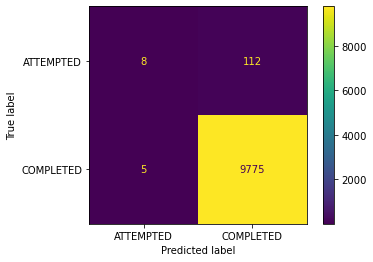

In [74]:
plot_confusion_matrix(final_pipe, X_test, y_test)

In [ ]:
#big dataset, high multidimensionality 

#random forest, log reg, support vector classifier 

#study my columns

#run the pipeline up above

In [ ]:
sns.pairplot(hue = 'Species', 
             vars = col_list,
             data = iris_df)
plt.show()